In [1]:
!pip install -r "../requirements.txt"


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from one.api import ONE
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from one.api import ONE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

## Load Data

In [4]:
one = ONE(base_url='https://openalyx.internationalbrainlab.org')

print(one.search_terms())

('dataset', 'date_range', 'laboratory', 'number', 'projects', 'subject', 'task_protocol', 'dataset_qc_lte')


In [5]:
help(one.search)

Help on method search in module one.api:

search(details=False, query_type=None, **kwargs) method of one.api.OneAlyx instance
    Searches sessions matching the given criteria and returns a list of matching eids.

    For a list of search terms, use the method

        one.search_terms(query_type='remote')

    For all search parameters, a single value or list may be provided.  For `dataset`,
    the sessions returned will contain all listed datasets.  For the other parameters,
    the session must contain at least one of the entries.

    For all but `date_range` and `number`, any field that contains the search string is
    returned.  Wildcards are not permitted, however if wildcards property is True, regular
    expressions may be used (see notes and examples).

    Parameters
    ----------
    dataset : str
        A (partial) dataset name. Returns sessions containing matching datasets.
        A dataset matches if it contains the search string e.g. 'wheel.position' matches
      

In [41]:
# All datasets in the database
dsets = one.list_datasets()
dsets

['alf/_ibl_trials.table.pqt',
 'alf/_ibl_trials.repNum.npy',
 'alf/probe00/pykilosort/#2024-05-06#/spikes.times.npy',
 'alf/probe00/pykilosort/#2024-05-06#/clusters.depths.npy',
 'raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.lf.meta',
 'alf/probe00/pykilosort/spikes.times.npy',
 'alf/probe00/pykilosort/#2024-05-06#/channels.brainLocationIds_ccf_2017.npy',
 'alf/rightROIMotionEnergy.position.npy',
 'raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.ch',
 'raw_ephys_data/probe00/_iblqc_ephysChannels.apRMS.npy',
 'alf/probe00/pykilosort/#2024-05-06#/spikes.depths.npy',
 'alf/_ibl_rightCamera.features.pqt',
 'raw_ephys_data/probe00/_iblqc_ephysSpectralDensityLF.power.npy',
 'raw_ephys_data/_spikeglx_sync.channels.npy',
 'alf/_ibl_wheel.position.npy',
 'alf/probe00/pykilosort/#2024-05-06#/clusters.uuids.csv',
 'alf/_ibl_leftCamera.times.npy',
 'raw_ephys_data/_spikeglx_ephysData_g0_t0.nidq.cbin',
 'alf/probe00/pykilosort/#2024-05-06#/spikes.clusters.npy',
 'alf/leftROIMoti

In [42]:
one.describe_dataset('trials.table');

A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times


In [43]:
eids, details = one.search(dataset='trials.table', details=True)
# eids, details = one.search(dataset='alf/_ibl_trials.feedbackType.npy', details=True)
pprint(eids)
pprint(len(eids))
# pprint(details)
# pprint(len(details))

['ebce500b-c530-47de-8cb1-963c552703ea',
 'a7eba2cf-427f-4df9-879b-e53e962eae18',
 '3a3ea015-b5f4-4e8b-b189-9364d1fc7435',
 '5ae68c54-2897-4d3a-8120-426150704385',
 'd85c454e-8737-4cba-b6ad-b2339429d99b',
 '11163613-a6c9-4975-9586-84dc00481547',
 'de905562-31c6-4c31-9ece-3ee87b97eab4',
 '15b69921-d471-4ded-8814-2adad954bcd8',
 'e6594a5b-552c-421a-b376-1a1baa9dc4fd',
 '4e560423-5caf-4cda-8511-d1ab4cd2bf7d',
 'c46b8def-620d-4d70-9397-be5694255f73',
 '6899a67d-2e53-4215-a52a-c7021b5da5d4',
 '3f71aa98-08c6-4e79-b4c8-00eae4f03eff',
 'a1782f4f-86b0-480c-a7f2-3d8f1ab482ab',
 '97c1d08d-57b4-4595-8052-91eb84ebfd74',
 '35eeb752-8f4f-4040-9714-ba0f5b7ccdfe',
 '004d8fd5-41e7-4f1b-a45b-0d4ad76fe446',
 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53',
 '7dd27c2f-9544-448d-918d-be0f9837b0e0',
 'caa5dddc-9290-4e27-9f5e-575ba3598614',
 '642c97ea-fe89-4ec9-8629-5e492ea4019d',
 'e6bdb1f4-b0bf-4451-8f23-4384f2102f91',
 '2584ce3c-db10-4076-89cb-5d313138dd38',
 '1dbba733-24a4-4400-9436-53f1bd8428e8',
 'e6de6c35-1508-

In [44]:
# eids = one.search(subject='NYU-21', dataset=['alf/_ibl_trials.feedbackType.npy'])
# pprint(eids)

In [45]:
# Initialize an empty list to hold DataFrames
dataframes = []

i = 100
eids_subset = eids[:i]
# Iterate over each eid and load trials data
for eid in eids_subset:
    try:
        # Load the trials dataset for the session
        trials = one.load_object(eid, 'trials', collection='alf')
        
        # Convert to DataFrame
        df = trials.to_df()
        
        # Add an identifier column for the session
        df['session_id'] = eid
        # add new features
        # Calculate previous reward and choice
        df['previous_reward'] = df['rewardVolume'].shift(1)
        df['previous_choice'] = df['choice'].shift(1)

        # Calculate cumulative reward
        df['cumulative_reward'] = df['rewardVolume'].cumsum()

        # Calculate reward slope (change in reward over trials)
        df['reward_slope'] = df['rewardVolume'].diff()

        # Define learning rate as the change in response times
        df['learning_rate'] = df['response_times'].diff()
        
        # Reaction time
        df['reaction_time'] = df['response_times'] - df['stimOn_times']
        
        # Append the DataFrame to the list
        dataframes.append(df)
        
        # Optional: print the shape and head of the DataFrame
        print(f"Session: {eid}, Shape: {df.shape}")
        print(df.head())
        
    except Exception as e:
        print(f"Error loading trials for session {eid}: {e}")

# Concatenate all DataFrames into a single DataFrame
all_trials_df = pd.concat(dataframes, ignore_index=True)

# Check the shape of the aggregated DataFrame
print(all_trials_df.shape)
all_trials_df.head()

Session: ebce500b-c530-47de-8cb1-963c552703ea, Shape: (569, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           13.648230      15.156255    13.649192       14.099033    -1.0   
1           16.858861      18.258806    16.859900       17.199067     1.0   
2           19.872914      21.272799    19.873893       20.212920    -1.0   
3           23.692570      25.072820    23.693512       24.023372    -1.0   
4           27.242310      28.575402    27.243189       27.521317    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     13.739751           NaN          1.000              0.5       14.099118   
1     16.858734          0.25            NaN              0.5       17.199169   
2     19.872693           NaN          0.250              0.5       20.213029   
3     23.692446           NaN          0.125              0.5       24.023482   
4     27.242123           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-09/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.05k/6.05k [00:00<00:00, 20.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-09/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 6.05k/6.05k [00:00<00:00, 19.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-09/001/alf/_ibl_trials.table.pqt: 100%|██████████| 59.2k/59.2k [00:00<00:00, 149kB/s]


Session: 98e0074c-706a-40e5-bbb5-223f97585a99, Shape: (740, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          113.215632     115.201645   113.216577      114.144432     1.0   
1          119.128517     120.495016   119.129486      119.437916    -1.0   
2          122.868009     124.400559   122.868779      123.345411     1.0   
3          126.228312     127.617704   126.229043      126.563610     1.0   
4          129.244795     130.661466   129.245674      129.605395     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    113.295169         1.000            NaN              0.5      114.144518   
1    119.128386           NaN          0.125              0.5      119.438022   
2    122.867912         0.125            NaN              0.5      123.345531   
3    126.228176         1.000            NaN              0.5      126.563709   
4    129.244641         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-08/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.56k/7.56k [00:00<00:00, 23.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-08/001/alf/_ibl_trials.table.pqt: 100%|██████████| 71.6k/71.6k [00:00<00:00, 162kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-08/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 7.56k/7.56k [00:00<00:00, 28.0kB/s]


Session: c02e5155-8e8f-427e-873d-d61490bbb9c3, Shape: (929, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           57.228772      58.976302    57.229510       57.911269     1.0   
1           64.069750      65.425590    64.070726       64.342750     1.0   
2           68.236344      69.819417    68.237342       68.753844     1.0   
3           72.725946      75.369396    72.726927       73.293547     1.0   
4           79.242344      80.558610    79.243142       79.479343     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     57.319734         1.000            NaN              0.5       57.911375   
1     64.069626         0.125            NaN              0.5       64.342865   
2     68.236242         1.000            NaN              0.5       68.753957   
3     72.725793           NaN         0.0625              0.5       73.294570   
4     79.242208         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-07/001/alf/_ibl_trials.table.pqt: 100%|██████████| 56.6k/56.6k [00:00<00:00, 144kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.74k/5.74k [00:00<00:00, 18.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-07/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.74k/5.74k [00:00<00:00, 19.3kB/s]


Session: 0cf6d255-8f2f-463e-84fb-c54bacb79f51, Shape: (702, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           52.414596      53.971169    52.415391       52.923494    -1.0   
1           57.927887      59.387694    57.928707       58.343287     1.0   
2           61.144085      62.444222    61.144918       61.399885     1.0   
3           65.120969      66.454121    65.121854       65.408566    -1.0   
4           70.094346      71.477418    70.095123       70.421045    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     52.487851           NaN         0.2500              0.5       52.923574   
1     57.927673           1.0            NaN              0.5       58.343365   
2     61.143918           1.0            NaN              0.5       61.399959   
3     65.120754           NaN         1.0000              0.5       65.408658   
4     70.094223           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-06/001/alf/_ibl_trials.table.pqt: 100%|██████████| 60.3k/60.3k [00:00<00:00, 143kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-06/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.20k/6.20k [00:00<00:00, 19.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-06/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 6.20k/6.20k [00:00<00:00, 20.7kB/s]


Session: 37bbc17f-8dec-4fa8-97fd-e23a5c6bad1f, Shape: (759, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           69.677630      71.035262    69.678565       69.967329     1.0   
1           72.645417      73.962003    72.646201       72.900719    -1.0   
2           76.385027      77.668366    76.385794       76.609727     1.0   
3           80.195418      81.484751    80.196080       80.421117    -1.0   
4           83.111910      84.784554    83.113021       83.732711     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     69.762056          1.00            NaN              0.5       69.967436   
1     72.645301           NaN          0.125              0.5       72.900809   
2     76.384861          0.25            NaN              0.5       76.609805   
3     80.195213           NaN          1.000              0.5       80.421224   
4     83.111755          0.00            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-05/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 7.12k/7.12k [00:00<00:00, 23.1kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-05/001/alf/_ibl_trials.table.pqt: 100%|██████████| 68.0k/68.0k [00:00<00:00, 157kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL050/2023-06-05/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.12k/7.12k [00:00<00:00, 22.2kB/s]


Session: 6ab9d98c-b1e9-4574-b8fe-b9eec88097e0, Shape: (874, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      80.149951           78.607608    78.608505       79.080308    -1.0   
1      83.983034           82.573302    82.574108       82.916201     1.0   
2      87.532846           86.223086    86.224043       86.474485    -1.0   
3      91.482851           89.289573    89.290337       89.424374     1.0   
4      94.532846           93.123276    93.123953       93.470076    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     78.699729           NaN          1.000              0.5       79.080391   
1     82.573109          0.25            NaN              0.5       82.916308   
2     86.222910           NaN          0.250              0.5       86.474585   
3     89.289437           NaN          0.125              0.5       89.425323   
4     93.123153           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-15/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.87k/4.87k [00:00<00:00, 15.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-15/001/alf/_ibl_trials.table.pqt: 100%|██████████| 49.4k/49.4k [00:00<00:00, 129kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-15/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.87k/4.87k [00:00<00:00, 16.4kB/s]


Session: 04749a70-ac63-477d-8392-d4d529184fab, Shape: (593, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      96.488550           60.370171    60.371029       94.427017     1.0   
1      99.705562           98.449514    98.450421       98.636115    -1.0   
2     105.399226          101.299422   101.300369      103.337619     1.0   
3     108.482551          107.055813   107.056627      107.423913     1.0   
4     112.532412          111.221809   111.222543      111.464208     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     60.466953           NaN         1.0000              0.5       94.427823   
1     98.449387           NaN         1.0000              0.5       98.636235   
2    101.299269           NaN         0.0625              0.5      103.338698   
3    107.055627         0.125            NaN              0.5      107.424023   
4    111.221643         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-14/001/alf/_ibl_trials.table.pqt: 100%|██████████| 52.0k/52.0k [00:00<00:00, 137kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-14/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.18k/5.18k [00:00<00:00, 15.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-14/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.18k/5.18k [00:00<00:00, 17.8kB/s]


Session: 7eeb8423-49e6-4d40-ab6f-703d17af231a, Shape: (632, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           54.290399      56.998066    54.291037       55.933095    -1.0   
1           59.374985      60.814551    59.375629       59.749683     1.0   
2           64.191383      65.348031    64.192213       64.284083    -1.0   
3           67.857986      69.157817    67.858847       68.103885     1.0   
4           72.647774      74.857580    72.648434       72.810474    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     54.374662           NaN          0.125              0.5       55.933173   
1     59.374795         0.125            NaN              0.5       59.749791   
2     64.191214           NaN          0.125              0.5       64.284171   
3     67.857814         1.000            NaN              0.5       68.103989   
4     72.647601         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-14/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.26k/4.26k [00:00<00:00, 12.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-14/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.26k/4.26k [00:00<00:00, 15.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-14/001/alf/_ibl_trials.table.pqt: 100%|██████████| 44.4k/44.4k [00:00<00:00, 92.2kB/s]


Session: 36573e0b-ddd6-4504-94ec-9a23c877486c, Shape: (516, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           77.060658      78.352264    77.061560       77.292058     1.0   
1           80.325258      82.558543    80.326167       80.490358     1.0   
2           84.885469      86.235376    84.886111       85.183169     1.0   
3           88.659067      89.908508    88.659733       88.838967    -1.0   
4           94.835353      97.091557    94.836282       95.031852    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     77.152217          1.00            NaN              0.5       77.292170   
1     80.325067           NaN          0.125              0.5       80.491183   
2     84.885344          0.25            NaN              0.5       85.183247   
3     88.658900           NaN          1.000              0.5       88.839049   
4     94.835216          0.00            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-13/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.16k/5.16k [00:00<00:00, 18.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-13/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.16k/5.16k [00:00<00:00, 17.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-13/001/alf/_ibl_trials.table.pqt: 100%|██████████| 51.8k/51.8k [00:00<00:00, 133kB/s]


Session: 14127fdb-2e66-4823-b124-f49c128ba94d, Shape: (629, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           74.852968      81.158950    74.853747       80.087246     1.0   
1           84.035639      88.102222    84.036596       86.042941    -1.0   
2           90.659139      95.051794    90.659800       92.985530    -1.0   
3           96.692317      98.125453    96.693030       97.063416    -1.0   
4          100.918608     103.285204   100.919307      101.222807    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     74.935806        0.2500            NaN              0.5       80.087357   
1     84.035529        0.1250            NaN              0.5       86.043895   
2     90.658967        0.1250            NaN              0.5       92.986434   
3     96.692130           NaN           0.25              0.5       97.063526   
4    100.918507        0.0625            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-13/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.22k/4.22k [00:00<00:00, 14.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-13/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.22k/4.22k [00:00<00:00, 14.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-13/001/alf/_ibl_trials.table.pqt: 100%|██████████| 43.6k/43.6k [00:00<00:00, 106kB/s]


Session: 5437ec1f-6535-470c-80b8-4c8806ee085d, Shape: (512, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           70.774980      71.963470    70.775755       70.915581    -1.0   
1           77.886166      79.303002    77.886977       78.253564     1.0   
2           82.263453      83.396593    82.264239       82.347453     1.0   
3           85.136453      86.363129    85.137185       85.318553    -1.0   
4           95.519448      97.652400    95.520347       96.596947    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     70.846948           NaN         0.2500              0.5       70.915674   
1     77.886011           1.0            NaN              0.5       78.253674   
2     82.263273           1.0            NaN              0.5       82.347564   
3     85.136286           NaN         1.0000              0.5       85.318667   
4     95.519280           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-12/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.88k/3.88k [00:00<00:00, 13.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-12/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.88k/3.88k [00:00<00:00, 14.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL035/2023-04-12/001/alf/_ibl_trials.table.pqt: 100%|██████████| 40.8k/40.8k [00:00<00:00, 98.1kB/s]


Session: a2b9fbbe-79fc-4166-a16e-b307813a2f06, Shape: (469, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           63.383129      64.692563    63.383994       63.631728    -1.0   
1           66.299521      70.425757    66.300269       69.365517     1.0   
2           72.016216      73.349131    72.017164       72.276917    -1.0   
3           75.059025      76.332333    75.059793       75.270125    -1.0   
4           77.942226      79.349031    77.943072       78.282325    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     63.475718           NaN          1.000              0.5       63.631836   
1     66.299336          0.25            NaN              0.5       69.365629   
2     72.016098           NaN          0.250              0.5       72.277038   
3     75.058827           NaN          0.125              0.5       75.270239   
4     77.942072           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-10/001/alf/_ibl_trials.table.pqt: 100%|██████████| 51.6k/51.6k [00:00<00:00, 119kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-10/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.14k/5.14k [00:00<00:00, 18.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-10/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.14k/5.14k [00:00<00:00, 17.9kB/s]


Session: 62ff920c-2fdd-4feb-9d9f-0d66f2e595a1, Shape: (627, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           75.177125      76.679065    75.177881       75.615425    -1.0   
1           78.869221      80.429023    78.870179       79.355820    -1.0   
2           82.035915      83.862213    82.036796       82.788613    -1.0   
3           85.468908      88.762023    85.469719       86.695810    -1.0   
4           92.002110      94.218644    92.002965       92.144210    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     75.279171           NaN         1.0000              0.5       75.615538   
1     78.869046           NaN         1.0000              0.5       79.355930   
2     82.035762           NaN         0.0625              0.5       82.788720   
3     85.468786         0.125            NaN              0.5       86.696729   
4     92.001966         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-09/001/alf/_ibl_trials.table.pqt: 100%|██████████| 50.0k/50.0k [00:00<00:00, 106kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-09/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.94k/4.94k [00:00<00:00, 17.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-09/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.94k/4.94k [00:00<00:00, 16.6kB/s]


Session: fd03d365-91df-41e2-ad81-9e0e4b9f5c7b, Shape: (601, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      62.210278           60.733573    60.734493       61.149872    -1.0   
1      65.437689           64.104364    64.105122       64.374963     1.0   
2      68.593640           66.976953    66.977735       67.538456    -1.0   
3      72.304136           70.904265    70.905009       71.245665    -1.0   
4      75.327100           73.926761    73.927640       74.270361    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     60.821051           NaN          1.000              0.5       61.149984   
1     64.104256          0.25            NaN              0.5       64.375062   
2     66.976768           NaN          0.250              0.5       67.538579   
3     70.904142           NaN          0.125              0.5       71.245741   
4     73.926573           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-07/001/alf/_ibl_trials.table.pqt: 100%|██████████| 50.5k/50.5k [00:00<00:00, 130kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.01k/5.01k [00:00<00:00, 17.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-07/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.01k/5.01k [00:00<00:00, 16.6kB/s]


Session: 7235b10c-6621-44ea-abe9-01559633472d, Shape: (610, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           71.352156      72.553577    71.352864       71.495155     1.0   
1           74.180633      79.530313    74.181481       78.492236    -1.0   
2           81.386936      82.663766    81.387694       81.610335     1.0   
3           85.253130      86.587074    85.253974       85.539531    -1.0   
4           88.180233      93.236642    88.180914       91.190733    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     71.430390          1.00            NaN              0.5       71.495250   
1     74.180481           NaN          0.125              0.5       78.492350   
2     81.386794          0.25            NaN              0.5       81.610438   
3     85.253007           NaN          1.000              0.5       85.539645   
4     88.180114          0.00            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-06/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.82k/4.82k [00:00<00:00, 15.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-06/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.82k/4.82k [00:00<00:00, 16.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL037/2023-04-06/001/alf/_ibl_trials.table.pqt: 100%|██████████| 49.0k/49.0k [00:00<00:00, 123kB/s]


Session: d23b005f-46f5-4fe1-870c-f55f6eb9533d, Shape: (586, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      64.999799           63.762498    63.763323       63.940498     1.0   
1      68.116421           66.726790    66.727627       67.045489     1.0   
2      71.833083           70.543278    70.544212       70.768578     1.0   
3      76.859780           74.259972    74.260840       74.805372     1.0   
4      79.949704           78.666671    78.667466       78.883571     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     63.843415         1.000            NaN              0.5       63.940605   
1     66.726627         0.125            NaN              0.5       67.045595   
2     70.543112         1.000            NaN              0.5       70.768689   
3     74.259840           NaN         0.0625              0.5       74.806485   
4     78.666466         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-20/001/alf/_ibl_trials.table.pqt: 100%|██████████| 62.3k/62.3k [00:00<00:00, 157kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-20/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.43k/6.43k [00:00<00:00, 23.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-20/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 6.43k/6.43k [00:00<00:00, 22.5kB/s]


Session: c958919c-2e75-435d-845d-5b62190b520e, Shape: (788, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           79.051150      80.932506    79.052027       79.860549     1.0   
1           83.238549      84.915741    83.239275       83.847250     1.0   
2           86.755258      88.396393    86.756190       87.325761     1.0   
3           90.121673      91.438189    90.122454       90.376372    -1.0   
4           94.348968      96.804585    94.349697       94.750868    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     79.138485        0.2500            NaN              0.5       79.860646   
1     83.238442        0.1250            NaN              0.5       83.847348   
2     86.755124        0.1250            NaN              0.5       87.325867   
3     90.121520           NaN           0.25              0.5       90.376461   
4     94.348798        0.0625            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-15/003/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.70k/5.70k [00:00<00:00, 15.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-15/003/alf/_ibl_trials.table.pqt: 100%|██████████| 56.2k/56.2k [00:00<00:00, 135kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-15/003/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.70k/5.70k [00:00<00:00, 19.3kB/s]


Session: f56194bc-8215-4ae8-bc6a-89781ad8e050, Shape: (696, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     176.557876          175.126320   175.127252      175.499519    -1.0   
1     183.557842          181.457517   181.458486      182.517919     1.0   
2     190.440854          189.140307   189.140984      189.383106     1.0   
3     193.623536          192.324003   192.324932      192.584904    -1.0   
4     197.657799          196.207615   196.208511      196.592014    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    175.191012           NaN         0.2500              0.5      175.499615   
1    181.457386           1.0            NaN              0.5      182.518013   
2    189.140117           1.0            NaN              0.5      189.383226   
3    192.323866           NaN         1.0000              0.5      192.585006   
4    196.207477           NaN         0.0625              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-14/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.80k/6.80k [00:00<00:00, 20.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-14/001/alf/_ibl_trials.table.pqt: 100%|██████████| 65.3k/65.3k [00:00<00:00, 131kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-14/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 6.80k/6.80k [00:00<00:00, 22.5kB/s]


Session: 29a6def1-fc5c-4eea-ac48-47e9b053dcb5, Shape: (834, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           82.283781      83.600172    82.284704       82.521781     1.0   
1           86.052877      87.433922    86.053627       86.357476     1.0   
2           93.202186      94.485750    93.203145       93.404787     1.0   
3           98.033592     102.619237    98.034396      101.535587    -1.0   
4          105.316487     107.483251   105.317267      105.408587    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     82.383228         1.000            NaN              0.5       82.521880   
1     86.052694         0.125            NaN              0.5       86.357597   
2     93.202046         1.000            NaN              0.5       93.404892   
3     98.033462           NaN         0.0625              0.5      101.535679   
4    105.316334         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-10/001/alf/_ibl_trials.table.pqt: 100%|██████████| 70.1k/70.1k [00:00<00:00, 170kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-10/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 7.38k/7.38k [00:00<00:00, 26.1kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-10/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.38k/7.38k [00:00<00:00, 25.2kB/s]


Session: 28338153-4113-485b-835b-91cb96d984f2, Shape: (906, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      88.456187           86.859249    86.859913       87.370848    -1.0   
1      91.956037           90.037648    90.038529       90.889350     1.0   
2      98.322667           96.754151    96.755057       97.238651    -1.0   
3     103.322167          100.004048   100.004999      102.253448    -1.0   
4     106.437822          105.087146   105.087957      105.367845    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     86.953770           NaN          1.000              0.5       87.370929   
1     90.037495          0.25            NaN              0.5       90.889443   
2     96.754024           NaN          0.250              0.5       97.238742   
3    100.003865           NaN          0.125              0.5      102.253540   
4    105.087024           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 8.93k/8.93k [00:00<00:00, 32.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-07/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 8.93k/8.93k [00:00<00:00, 31.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0028/2023-03-07/001/alf/_ibl_trials.table.pqt: 100%|██████████| 83.9k/83.9k [00:00<00:00, 122kB/s]


Session: 5c0c560e-9e1f-45e9-b66e-e4ee7855be84, Shape: (1100, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          136.401448     137.863479   136.402258      136.803946     1.0   
1          140.297236     141.680431   140.298169      140.611437    -1.0   
2          143.413944     146.263572   143.414790      145.193148     1.0   
3          148.680655     150.213677   148.681364      149.144656    -1.0   
4          151.930357     154.780154   151.931272      153.707447     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    136.497116          1.00            NaN              0.5      136.804052   
1    140.297102           NaN          0.125              0.5      140.611537   
2    143.413757          0.25            NaN              0.5      145.193246   
3    148.680497           NaN          1.000              0.5      149.144751   
4    151.930205          0.00            NaN              0.5      

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.59k/4.59k [00:00<00:00, 14.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-07/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.59k/4.59k [00:00<00:00, 16.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-07/001/alf/_ibl_trials.table.pqt: 100%|██████████| 47.1k/47.1k [00:00<00:00, 117kB/s]


Session: f4eb56a4-8bf8-4bbc-a8f3-6e6535134bad, Shape: (558, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          101.055802     102.437889   101.056593      101.373102    -1.0   
1          104.871307     106.221143   104.872178      105.150709    -1.0   
2          108.888023     110.471118   108.888777      109.403725    -1.0   
3          113.804633     115.121053   113.805352      114.048533     1.0   
4          118.454620     119.720960   118.455587      118.658219     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    101.154650           NaN         1.0000              0.5      101.373228   
1    104.871179           NaN         1.0000              0.5      105.150817   
2    108.887877           NaN         0.0625              0.5      109.403825   
3    113.804518         0.125            NaN              0.5      114.048627   
4    118.454420         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-03/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.55k/5.55k [00:00<00:00, 17.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-03/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.55k/5.55k [00:00<00:00, 19.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-03/001/alf/_ibl_trials.table.pqt: 100%|██████████| 55.0k/55.0k [00:00<00:00, 127kB/s]


Session: 2d9bfc10-59fb-424a-b699-7c42f86c7871, Shape: (678, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      85.264206           84.061215    84.062026       84.205016     1.0   
1      89.780654           88.464116    88.464919       88.715616     1.0   
2      95.197246           93.380710    93.381494       94.121409     1.0   
3     102.113654           99.864011    99.864713      100.049911     1.0   
4     107.447188          106.130713   106.131619      106.374513     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     84.164149         1.000            NaN              0.5       84.205112   
1     88.463986         0.125            NaN              0.5       88.715728   
2     93.380594         1.000            NaN              0.5       94.121520   
3     99.863813           NaN         0.0625              0.5      100.050727   
4    106.130519         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-01/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.34k/4.34k [00:00<00:00, 14.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-01/001/alf/_ibl_trials.table.pqt: 100%|██████████| 45.0k/45.0k [00:00<00:00, 114kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-02-01/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.34k/4.34k [00:00<00:00, 13.1kB/s]


Session: 7cc74598-9c1b-436b-84fa-0bf89f31adf6, Shape: (526, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           45.654560      46.842515    45.655367       45.786660     1.0   
1           49.192255      54.175615    49.192947       52.107659     1.0   
2           55.875764      57.158950    55.876478       56.091964     1.0   
3           59.842568      61.441955    59.843415       60.379468    -1.0   
4           63.159070      64.475585    63.160017       63.409470     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     45.742759          1.00            NaN              0.5       45.786754   
1     49.192114           NaN          0.125              0.5       52.108555   
2     55.875579          0.25            NaN              0.5       56.092057   
3     59.842415           NaN          1.000              0.5       60.379561   
4     63.158917          0.00            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-01-19/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.44k/5.44k [00:00<00:00, 17.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-01-19/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.44k/5.44k [00:00<00:00, 18.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0024/2023-01-19/001/alf/_ibl_trials.table.pqt: 100%|██████████| 54.1k/54.1k [00:00<00:00, 137kB/s]


Session: 3bcb81b4-d9ca-4fc9-a1cd-353a966239ca, Shape: (664, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          116.748962     118.227009   116.749791      117.169063    -1.0   
1          120.893867     122.260373   120.894709      121.202367     1.0   
2          128.210157     132.076658   128.210911      131.011654    -1.0   
3          134.910351     136.393559   134.911074      135.328851    -1.0   
4          138.693451     140.426723   138.694329      139.368851    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    116.843981           NaN          1.000              0.5      117.169149   
1    120.893743          0.25            NaN              0.5      121.202479   
2    128.210044           NaN          0.250              0.5      131.011764   
3    134.910241           NaN          0.125              0.5      135.328966   
4    138.693296           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-12-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.18k/5.18k [00:00<00:00, 17.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-12-07/001/alf/_ibl_trials.table.pqt: 100%|██████████| 52.0k/52.0k [00:00<00:00, 137kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-12-07/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.18k/5.18k [00:00<00:00, 19.3kB/s]


Session: c8e11fd8-d130-4f06-abba-9aa20240ce7c, Shape: (632, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           67.783220      69.026330    67.783954       67.960720     1.0   
1           71.628519      73.009465    71.629203       71.957519    -1.0   
2           81.745919      82.995666    81.746725       81.937919     1.0   
3           86.876014      88.111955    86.876978       87.054614     1.0   
4           93.009202      94.194746    93.009865       93.136302     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     67.876378         1.000            NaN              0.5       67.960837   
1     71.628403           NaN          0.125              0.5       71.957604   
2     81.745725         0.125            NaN              0.5       81.938005   
3     86.875845         1.000            NaN              0.5       87.054694   
4     93.009065         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-19/001/alf/_ibl_trials.table.pqt: 100%|██████████| 40.1k/40.1k [00:00<00:00, 109kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-19/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.78k/3.78k [00:00<00:00, 13.1kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-19/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.78k/3.78k [00:00<00:00, 11.4kB/s]


Session: c23b4118-db40-4333-af1d-933154b533c6, Shape: (457, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           53.523249      54.806352    53.523914       53.745748    -1.0   
1           58.703131      60.022997    58.703829       58.958930    -1.0   
2           62.369623      69.156050    62.370429       67.086132     1.0   
3           70.802834      72.069326    70.803619       71.013033     1.0   
4           73.922821      75.222577    73.923574       74.162722     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     53.602973           NaN         1.0000              0.5       53.745825   
1     58.703029           NaN         1.0000              0.5       58.959037   
2     62.369529           NaN         0.0625              0.5       67.087024   
3     70.802652         0.125            NaN              0.5       71.013131   
4     73.922640         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-17/001/alf/_ibl_trials.table.pqt: 100%|██████████| 44.8k/44.8k [00:00<00:00, 108kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-17/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.30k/4.30k [00:00<00:00, 15.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-17/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.30k/4.30k [00:00<00:00, 15.0kB/s]


Session: 9fcbd1a0-77e6-4c41-9428-eeaee74becd5, Shape: (522, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          120.262574     122.107255   120.263406      121.054974     1.0   
1          123.921369     125.404325   123.922340      124.346966    -1.0   
2          127.874260     129.154583   127.874945      128.104461     1.0   
3          130.774172     132.237508   130.774888      131.188971    -1.0   
4          133.874062     136.437555   133.874845      135.377356     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    120.337698          1.00            NaN              0.5      121.055060   
1    123.921207           NaN          0.125              0.5      124.347064   
2    127.874078          0.25            NaN              0.5      128.104555   
3    130.773988           NaN          1.000              0.5      131.189080   
4    133.873911          0.00            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-16/001/alf/_ibl_trials.table.pqt: 100%|██████████| 51.8k/51.8k [00:00<00:00, 102kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-16/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.16k/5.16k [00:00<00:00, 15.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-16/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.16k/5.16k [00:00<00:00, 20.3kB/s]


Session: fbd28ea6-3251-48e0-b215-2c51ec5185f7, Shape: (629, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          182.792531     184.209411   182.793386      183.162731     1.0   
1          187.329329     188.645967   187.329965      187.573929     1.0   
2          198.092615     199.359195   198.093455      198.293914     1.0   
3          203.295519     205.242307   203.296368      204.179221    -1.0   
4          207.779023     209.062058   207.779953      207.990223     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    182.876144         1.000            NaN              0.5      183.162815   
1    187.329199         0.125            NaN              0.5      187.574007   
2    198.092422         1.000            NaN              0.5      198.294035   
3    203.295335           NaN         0.0625              0.5      204.179313   
4    207.778853         0.250            NaN              0.5      2

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-15/001/alf/_ibl_trials.table.pqt: 100%|██████████| 48.4k/48.4k [00:00<00:00, 126kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-15/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 15.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL031/2022-11-15/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.74k/4.74k [00:00<00:00, 16.5kB/s]


Session: ef38e503-dd79-4185-bf87-4712d4f274fe, Shape: (577, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     102.529746          101.211521   101.212478      101.469319    -1.0   
1     107.615837          106.299415   106.300369      106.547116     1.0   
2     114.595739          112.829707   112.830582      113.538604    -1.0   
3     118.982301          117.532504   117.533512      117.922907    -1.0   
4     121.979301          120.679515   120.680464      120.921313    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    101.296036           NaN          1.000              0.5      101.469419   
1    106.299236          0.25            NaN              0.5      106.547211   
2    112.829583           NaN          0.250              0.5      113.538712   
3    117.532346           NaN          0.125              0.5      117.923007   
4    120.679364           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-11-03/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.05k/4.05k [00:00<00:00, 14.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-11-03/001/alf/_ibl_trials.table.pqt: 100%|██████████| 42.3k/42.3k [00:00<00:00, 104kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-11-03/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.05k/4.05k [00:00<00:00, 15.2kB/s]


Session: 37ac03f1-9831-4a30-90fc-a59e635b98bd, Shape: (490, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           65.783590      67.010398    65.784521       65.962189    -1.0   
1           68.641187      70.010098    68.642135       68.961687     1.0   
2           72.257696      73.527013    72.258407       72.478297    -1.0   
3           75.391003      76.657367    75.391693       75.615402    -1.0   
4           78.277189      79.540678    78.277971       78.483687    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     65.857580           NaN          1.000              0.5       65.962303   
1     68.641069          0.25            NaN              0.5       68.961803   
2     72.257574           NaN          0.250              0.5       72.478385   
3     75.390794           NaN          0.125              0.5       75.615504   
4     78.277005           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-11-02/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.49k/3.49k [00:00<00:00, 12.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-11-02/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.49k/3.49k [00:00<00:00, 13.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-11-02/001/alf/_ibl_trials.table.pqt: 100%|██████████| 37.7k/37.7k [00:00<00:00, 102kB/s]


Session: be164a14-6e73-42c3-ab60-d29c48693c0f, Shape: (420, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           79.634359      80.940605    79.635202       79.883759    -1.0   
1           82.993961      84.342832    82.994800       83.286760     1.0   
2           86.623952      87.843581    86.624737       86.786451     1.0   
3           90.207143      91.473685    90.208012       90.409243    -1.0   
4           95.960036      98.273472    95.960903       96.205535     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     79.723927           NaN         0.2500              0.5       79.883844   
1     82.993800           1.0            NaN              0.5       83.286870   
2     86.623837           1.0            NaN              0.5       86.786554   
3     90.206945           NaN         1.0000              0.5       90.409358   
4     95.959870           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-29/002/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.16k/5.16k [00:00<00:00, 19.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-29/002/alf/_ibl_trials.table.pqt: 100%|██████████| 51.6k/51.6k [00:00<00:00, 135kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-29/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.16k/5.16k [00:00<00:00, 17.8kB/s]


Session: 94dabed1-741c-4ddd-a6b7-70561e27b750, Shape: (629, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     128.293203          126.863583   126.864312      127.227285     1.0   
1     131.609838          130.296493   130.297236      130.543093    -1.0   
2     134.943038          133.213095   133.213877      133.875194     1.0   
3     137.896276          136.612888   136.613804      136.824886    -1.0   
4     141.692729          139.509872   139.510781      139.616772    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    126.960069          1.00            NaN              0.5      127.227376   
1    130.296369           NaN          0.125              0.5      130.543178   
2    133.212877          0.25            NaN              0.5      133.875278   
3    136.612771           NaN          1.000              0.5      136.824983   
4    139.509714          0.00            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-28/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.86k/4.86k [00:00<00:00, 14.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-28/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.86k/4.86k [00:00<00:00, 17.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-28/001/alf/_ibl_trials.table.pqt: 100%|██████████| 49.3k/49.3k [00:00<00:00, 125kB/s]


Session: 2ab7d2c2-bcb7-4ae6-9626-f3786c22d970, Shape: (591, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           67.088545      68.360963    67.089490       67.299946    -1.0   
1           69.991449      71.308035    69.992133       70.241847    -1.0   
2           73.477633      76.757757    73.478385       74.702537    -1.0   
3           78.394143      79.727426    78.394960       78.661140    -1.0   
4           81.740925      82.910541    81.741592       81.841825    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     67.174515           NaN          1.000              0.5       67.300036   
1     69.991300           NaN          0.125              0.5       70.241942   
2     73.477485           0.0            NaN              0.5       74.703362   
3     78.393960           NaN          0.125              0.5       78.661233   
4     81.740792           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-26/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.55k/5.55k [00:00<00:00, 20.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-26/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.55k/5.55k [00:00<00:00, 18.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-26/001/alf/_ibl_trials.table.pqt: 100%|██████████| 55.0k/55.0k [00:00<00:00, 124kB/s]


Session: 49250fba-801c-4867-a0a7-a1e19538cb61, Shape: (678, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           60.315314      61.565143    60.316234       60.503413    -1.0   
1           64.468198      66.617871    64.469152       64.561198    -1.0   
2           69.498392      70.698263    69.499083       69.630292    -1.0   
3           74.051288      75.364563    74.051994       74.302788     1.0   
4           77.767692      80.131286    77.768622       79.074798     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     60.398360           NaN          0.125              0.5       60.503516   
1     64.468019         0.125            NaN              0.5       64.565143   
2     69.498216           NaN          0.125              0.5       69.630403   
3     74.051127         1.000            NaN              0.5       74.302902   
4     77.767589         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-25/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.82k/5.82k [00:00<00:00, 20.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-25/001/alf/_ibl_trials.table.pqt: 100%|██████████| 57.2k/57.2k [00:00<00:00, 100kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-25/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.82k/5.82k [00:00<00:00, 17.9kB/s]


Session: a34b4013-414b-42ed-9318-e93fbbc71e7b, Shape: (711, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      59.271806           57.998403    57.999299       58.217602    -1.0   
1      62.685564           61.402493    61.403226       61.643393     1.0   
2      68.302169           66.988490    66.989134       67.258591    -1.0   
3      75.355097           73.904789    73.905709       74.306588     1.0   
4      79.885344           77.702182    77.702962       78.827678     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     58.068926           NaN          0.125              0.5       58.217711   
1     61.402326        1.0000            NaN              0.5       61.643502   
2     66.988334           NaN          0.125              0.5       67.258673   
3     73.904642        0.2500            NaN              0.5       74.306669   
4     77.701996        0.0625            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-20/001/alf/_ibl_trials.table.pqt: 100%|██████████| 42.8k/42.8k [00:00<00:00, 105kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-20/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.12k/4.12k [00:00<00:00, 14.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-20/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.12k/4.12k [00:00<00:00, 12.9kB/s]


Session: 6cbeead9-bb7a-40e1-8ccd-47ae60239654, Shape: (499, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      56.322701           54.891314    54.892177       55.263415    -1.0   
1      60.402892           59.086417    59.087124       59.333017     1.0   
2      63.456320           62.189116    62.190047       62.387215     1.0   
3      66.536246           65.203011    65.203712       65.460110    -1.0   
4      70.719527           68.339607    68.340299       69.647712    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     54.969702           NaN         0.2500              0.5       55.263506   
1     59.086291           1.0            NaN              0.5       59.333133   
2     62.188980           1.0            NaN              0.5       62.387327   
3     65.202846           NaN         1.0000              0.5       65.460220   
4     68.339399           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-19/001/alf/_ibl_trials.table.pqt: 100%|██████████| 60.2k/60.2k [00:00<00:00, 155kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-19/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.17k/6.17k [00:00<00:00, 23.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-19/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 6.17k/6.17k [00:00<00:00, 23.8kB/s]


Session: 3bb54985-77b2-421d-9d1f-46185be51216, Shape: (755, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           49.267624      50.565710    49.268506       49.508025    -1.0   
1           55.212920      56.762756    55.213745       55.699919     1.0   
2           58.765516      60.031796    58.766356       58.975316    -1.0   
3           61.579424      63.948605    61.580308       62.898526    -1.0   
4           65.579132      66.898676    65.579908       65.848332    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     49.346165           NaN          1.000              0.5       49.508149   
1     55.212745          0.25            NaN              0.5       55.700029   
2     58.765356           NaN          0.250              0.5       58.975435   
3     61.579208           NaN          0.125              0.5       62.898610   
4     65.578975           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-18/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.54k/7.54k [00:00<00:00, 25.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-18/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 7.54k/7.54k [00:00<00:00, 27.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL034/2022-10-18/001/alf/_ibl_trials.table.pqt: 100%|██████████| 71.4k/71.4k [00:00<00:00, 182kB/s]


Session: 87ad026d-5b95-4022-8d59-c260870d830f, Shape: (926, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           65.243147      66.566609    65.243942       65.505746     1.0   
1           68.163534      78.465853    68.164216       76.408838     1.0   
2           80.096335      81.412825    80.097023       80.363634     1.0   
3           83.266318      84.716028    83.267306       83.664418    -1.0   
4           86.362817      89.712761    86.363596       88.667218     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     65.329833          1.00            NaN              0.5       65.505849   
1     68.163350           NaN          0.125              0.5       76.409758   
2     80.096156          0.25            NaN              0.5       80.363729   
3     83.266206           NaN          1.000              0.5       83.664533   
4     86.362630          0.00            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-17/002/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.68k/3.68k [00:00<00:00, 13.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-17/002/alf/_ibl_trials.table.pqt: 100%|██████████| 39.2k/39.2k [00:00<00:00, 95.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-17/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.68k/3.68k [00:00<00:00, 14.2kB/s]


Session: 233617ec-c5cf-4eda-afc8-3b1d94f36d73, Shape: (444, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      91.807118           56.956139    56.956870       90.744717    -1.0   
1      95.540645           94.187812    94.188580       94.467011     1.0   
2     100.757157           97.504506    97.505182       99.691909    -1.0   
3     110.423323          103.554411   103.555077      108.358511     1.0   
4     115.203778          113.054109   113.054893      114.139207    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     57.055227           NaN          1.000              0.5       90.744825   
1     94.187647          0.25            NaN              0.5       94.467119   
2     97.504415           NaN          0.250              0.5       99.692030   
3    103.554277           NaN          0.125              0.5      108.359330   
4    113.053993           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-13/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.16k/4.16k [00:00<00:00, 15.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-13/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.16k/4.16k [00:00<00:00, 14.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-13/001/alf/_ibl_trials.table.pqt: 100%|██████████| 43.1k/43.1k [00:00<00:00, 108kB/s]


Session: 61caa69d-088b-465a-b9d0-d75341dabac6, Shape: (504, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           53.562843      55.839382    53.563543       54.776340    -1.0   
1           59.670143      61.036762    59.671099       59.974644     1.0   
2           64.240037      65.703396    64.241009       64.650835    -1.0   
3           68.689922      70.019897    68.690597       68.953022     1.0   
4           74.189631      75.506049    74.190580       74.443532     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     53.653601           NaN          0.125              0.5       54.776455   
1     59.669999         0.125            NaN              0.5       59.974735   
2     64.239875           NaN          0.125              0.5       64.650934   
3     68.689797         1.000            NaN              0.5       68.953137   
4     74.189414         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-12/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.49k/3.49k [00:00<00:00, 12.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-12/001/alf/_ibl_trials.table.pqt: 100%|██████████| 37.7k/37.7k [00:00<00:00, 86.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-12/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.49k/3.49k [00:00<00:00, 9.51kB/s]


Session: 9fc31d79-b56f-46d0-92a0-e9563caf4a7a, Shape: (420, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          103.644664     104.919107   103.645534      103.862764    -1.0   
1          108.955262     111.285770   108.956103      110.231661     1.0   
2          113.238557     115.421923   113.239342      113.360857    -1.0   
3          118.019149     119.388527   118.019930      118.328249     1.0   
4          121.052450     122.368695   121.053227      121.306851    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    103.736025           NaN          1.000              0.5      103.862846   
1    108.955070         0.125            NaN              0.5      110.231742   
2    113.238408         1.000            NaN              0.5      113.362029   
3    118.019030         0.125            NaN              0.5      118.328366   
4    121.052260           NaN          0.125              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-11/001/alf/_ibl_trials.table.pqt: 100%|██████████| 47.2k/47.2k [00:00<00:00, 116kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-11/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.61k/4.61k [00:00<00:00, 13.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-11/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.61k/4.61k [00:00<00:00, 13.8kB/s]


Session: 837b4e6a-ccfd-49b0-a1dd-3aa53fbf2ecb, Shape: (560, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           62.466262      63.841582    62.466953       62.769463     1.0   
1           66.561668      67.878078    66.562543       66.813868    -1.0   
2           70.941565      72.311335    70.942472       71.252765     1.0   
3           74.324760      75.627836    74.325733       74.557361     1.0   
4           79.108258      80.707995    79.108988       79.658557     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     62.541912         1.000            NaN              0.5       62.769556   
1     66.561477           NaN          0.125              0.5       66.813951   
2     70.941438         0.125            NaN              0.5       71.252874   
3     74.324600         1.000            NaN              0.5       74.557477   
4     79.108122         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-10/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.38k/5.38k [00:00<00:00, 17.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-10/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.38k/5.38k [00:00<00:00, 16.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-10/001/alf/_ibl_trials.table.pqt: 100%|██████████| 53.1k/53.1k [00:00<00:00, 121kB/s]


Session: 7f150b7c-c261-46e6-9edb-cc391c9d9f03, Shape: (656, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           67.453310      68.683231    67.453987       67.638211    -1.0   
1           71.197113      72.480051    71.197913       71.410613    -1.0   
2           74.133311      75.446788    74.134186       74.380411    -1.0   
3           79.683115      81.096490    79.683764       80.032115     1.0   
4           84.549504      85.915908    84.550344       84.856303     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     67.530280           NaN         1.0000              0.5       67.638302   
1     71.196913           NaN         1.0000              0.5       71.410725   
2     74.133153           NaN         0.0625              0.5       74.380495   
3     79.682998         0.125            NaN              0.5       80.032196   
4     84.549378         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-08/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.39k/3.39k [00:00<00:00, 12.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-08/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.39k/3.39k [00:00<00:00, 9.90kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-08/001/alf/_ibl_trials.table.pqt: 100%|██████████| 36.9k/36.9k [00:00<00:00, 87.2kB/s]


Session: 500a71dd-8768-4211-a1fe-1fafc9fcbf29, Shape: (408, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      58.252574           56.902908    56.903809       57.198806    -1.0   
1      62.335566           60.282894    60.283738       61.276093     1.0   
2      65.849414           64.549497    64.550344       64.789598     1.0   
3      69.685197           68.352601    68.353264       68.619700     1.0   
4     119.348231           71.299190    71.299903      118.285085    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     56.999533           NaN          1.000              0.5       57.198913   
1     60.282704         0.125            NaN              0.5       61.276205   
2     64.549378         1.000            NaN              0.5       64.789720   
3     68.352464         0.125            NaN              0.5       68.619804   
4     71.299036           NaN          0.125              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-07/001/alf/_ibl_trials.table.pqt: 100%|██████████| 46.6k/46.6k [00:00<00:00, 117kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-07/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.54k/4.54k [00:00<00:00, 16.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-07/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.54k/4.54k [00:00<00:00, 16.9kB/s]


Session: 75db708a-9952-4452-a5b1-a851d88f8e28, Shape: (551, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           63.334447      64.748525    63.335199       63.697847     1.0   
1           69.579036      70.912108    69.579775       69.865335     1.0   
2           72.731528      74.014464    72.732359       72.960428     1.0   
3           76.245424      77.598306    76.246308       76.548125    -1.0   
4           86.695324      87.948004    86.696130       86.896824     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     63.412325         1.000            NaN              0.5       63.697930   
1     69.578908         0.125            NaN              0.5       69.865446   
2     72.731359         1.000            NaN              0.5       72.960537   
3     76.245275           NaN         0.0625              0.5       76.548244   
4     86.695163         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-06/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.82k/4.82k [00:00<00:00, 16.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-06/001/alf/_ibl_trials.table.pqt: 100%|██████████| 49.0k/49.0k [00:00<00:00, 116kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-06/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.82k/4.82k [00:00<00:00, 17.7kB/s]


Session: cef05f87-161b-4031-932c-6f47daf89698, Shape: (586, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           65.669766      67.003366    65.670599       65.955465    -1.0   
1           68.883458      70.333299    68.884211       69.283658     1.0   
2           71.886755      73.199946    71.887511       72.159554    -1.0   
3           74.736940      76.469719    74.738125       75.430042    -1.0   
4           79.066452      80.286637    79.067359       79.234052    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     65.750024           NaN          1.000              0.5       65.955570   
1     68.883344          0.25            NaN              0.5       69.283771   
2     71.886577           NaN          0.250              0.5       72.159650   
3     74.736792           NaN          0.125              0.5       75.430156   
4     79.066259           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-06/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.41k/4.41k [00:00<00:00, 14.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-06/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.41k/4.41k [00:00<00:00, 15.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-10-06/001/alf/_ibl_trials.table.pqt: 100%|██████████| 45.6k/45.6k [00:00<00:00, 94.5kB/s]


Session: 2038e95d-64d4-4ecb-83d0-1308d3c598f8, Shape: (535, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           60.945447      62.360263    60.946138       61.283047     1.0   
1           65.547249      67.093323    65.548078       66.046849     1.0   
2           69.813647      71.459853    69.814318       70.414047     1.0   
3           73.196946      74.743125    73.197613       73.688047    -1.0   
4           76.380052      77.746158    76.380861       76.677352     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     61.027030        0.2500            NaN              0.5       61.283138   
1     65.547111        0.1250            NaN              0.5       66.046928   
2     69.813451        0.1250            NaN              0.5       70.414158   
3     73.196780           NaN           0.25              0.5       73.688130   
4     76.379928        0.0625            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-05/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.53k/4.53k [00:00<00:00, 15.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-05/001/alf/_ibl_trials.table.pqt: 100%|██████████| 46.6k/46.6k [00:00<00:00, 112kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-05/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.53k/4.53k [00:00<00:00, 15.0kB/s]


Session: 4546cd60-fa2a-4d20-a9b6-d091e01d16f2, Shape: (550, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      56.603072           55.291264    55.292137       55.538464    -1.0   
1      59.802919           58.216360    58.217111       58.735057     1.0   
2      64.583108           63.282956    63.283671       63.530057     1.0   
3      71.699296           70.402954    70.403892       70.635253    -1.0   
4      75.585741           74.169154    74.169849       74.524656    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     55.383028           NaN         0.2500              0.5       55.538546   
1     58.216211           1.0            NaN              0.5       58.735159   
2     63.282771           1.0            NaN              0.5       63.530146   
3     70.402826           NaN         1.0000              0.5       70.635369   
4     74.168949           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-04/002/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.40k/5.40k [00:00<00:00, 19.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-04/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.40k/5.40k [00:00<00:00, 18.1kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL033/2022-10-04/002/alf/_ibl_trials.table.pqt: 100%|██████████| 53.8k/53.8k [00:00<00:00, 126kB/s]


Session: 62902992-8432-46fb-af12-6392012e58c7, Shape: (659, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     114.192580          112.684634   112.685664      113.130234     1.0   
1     118.506315          117.172938   117.173581      117.453439    -1.0   
2     122.172748          120.692340   120.693196      121.121341     1.0   
3     125.039461          123.776038   123.776821      123.994136    -1.0   
4     129.039261          126.625522   126.626436      126.990122    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    112.756290          1.00            NaN              0.5      113.130319   
1    117.172815           NaN          0.125              0.5      117.453520   
2    120.692163          0.25            NaN              0.5      121.121420   
3    123.775855           NaN          1.000              0.5      123.994233   
4    126.625336          0.00            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-16/001/alf/_ibl_trials.table.pqt: 100%|██████████| 45.5k/45.5k [00:00<00:00, 108kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-16/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.38k/4.38k [00:00<00:00, 14.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-16/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.38k/4.38k [00:00<00:00, 15.5kB/s]


Session: c16d3557-b2c1-4545-93d0-112ac0915d93, Shape: (532, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           51.376808      75.352531    51.377762       73.289799     1.0   
1           80.498990      83.382061    80.499949       81.324888     1.0   
2           85.035683      90.585441    85.036529       88.529490     1.0   
3           92.215497     104.551744    92.216411      103.489595     1.0   
4          106.448498     107.764922   106.449221      106.715900     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     51.466253           NaN         1.0000              0.5       73.290737   
1     80.498849           NaN         1.0000              0.5       81.325933   
2     85.035562           NaN         0.0625              0.5       88.530479   
3     92.215311         0.125            NaN              0.5      103.489683   
4    106.448387         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-16/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.15k/4.15k [00:00<00:00, 12.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-16/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.15k/4.15k [00:00<00:00, 14.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-16/001/alf/_ibl_trials.table.pqt: 100%|██████████| 43.1k/43.1k [00:00<00:00, 85.1kB/s]


Session: bb8d9451-fdbd-4f46-b52e-9290e8f84d2e, Shape: (503, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          155.633016     158.007431   155.633702      155.957418    -1.0   
1          160.571555     163.487783   160.572374      161.427464    -1.0   
2          166.307407     168.937905   166.308368      166.883509    -1.0   
3          174.073854     175.420923   174.074691      174.360656    -1.0   
4          177.474079     180.140451   177.475017      178.081582    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    155.723759        0.2500            NaN              0.5      155.958369   
1    160.571375        0.1250            NaN              0.5      161.428356   
2    166.307201        0.1250            NaN              0.5      166.884377   
3    174.073691           NaN           0.25              0.5      174.360762   
4    177.473884        0.0625            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-15/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.91k/3.91k [00:00<00:00, 14.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-15/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.91k/3.91k [00:00<00:00, 13.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-15/001/alf/_ibl_trials.table.pqt: 100%|██████████| 41.1k/41.1k [00:00<00:00, 93.9kB/s]


Session: bd07e3a7-09c3-4b67-996b-42b6d5cedf1c, Shape: (473, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           63.038898      82.459020    63.039762       80.400894     1.0   
1           84.238893      86.291837    84.239742       85.238794     1.0   
2           89.488889      90.775522    89.489650       89.731788     1.0   
3           92.505379     100.192046    92.506282       99.134270    -1.0   
4          102.521967     115.154750   102.522780      114.109862    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     63.122554           NaN         0.2500              0.5       80.401859   
1     84.238675           1.0            NaN              0.5       85.238875   
2     89.488684           1.0            NaN              0.5       89.731893   
3     92.505282           NaN         1.0000              0.5       99.134386   
4    102.521780           NaN         0.0625              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-15/001/alf/_ibl_trials.table.pqt: 100%|██████████| 45.4k/45.4k [00:00<00:00, 110kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-15/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.38k/4.38k [00:00<00:00, 13.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-15/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.38k/4.38k [00:00<00:00, 15.9kB/s]


Session: 8c025071-c4f3-426c-9aed-f149e8f75b7b, Shape: (531, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      85.357163           84.037397    84.038329       84.296798    -1.0   
1      94.243308           92.877364    92.878311       93.185466     1.0   
2      99.290037           97.973904    97.974968       98.230005    -1.0   
3     107.106488          105.777054   105.777954      106.043656    -1.0   
4     110.540212          109.259978   109.260939      109.504680    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     84.127086           NaN          1.000              0.5       84.296903   
1     92.877211          0.25            NaN              0.5       93.185547   
2     97.973768           NaN          0.250              0.5       98.230109   
3    105.776888           NaN          0.125              0.5      106.043761   
4    109.259806           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-14/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.04k/4.04k [00:00<00:00, 6.67kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-14/001/alf/_ibl_trials.table.pqt: 100%|██████████| 42.1k/42.1k [00:00<00:00, 98.8kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-14/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.04k/4.04k [00:00<00:00, 14.3kB/s]


Session: 6bf810fd-fbeb-4eea-9ea7-b6791d002b22, Shape: (489, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          137.052550     138.330399   137.053293      137.255350     1.0   
1          139.942953     143.959603   139.943938      141.881554     1.0   
2          145.613257     146.942804   145.614170      145.874658     1.0   
3          148.813361     152.475918   148.814117      151.401651    -1.0   
4          154.112943     163.625869   154.113687      161.561852    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    137.143051          1.00            NaN              0.5      137.255473   
1    139.942838           NaN          0.125              0.5      141.882577   
2    145.613104          0.25            NaN              0.5      145.874744   
3    148.813184           NaN          1.000              0.5      151.401758   
4    154.112821          0.00            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-12/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.02k/4.02k [00:00<00:00, 15.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-12/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.02k/4.02k [00:00<00:00, 13.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL030/2022-09-12/001/alf/_ibl_trials.table.pqt: 100%|██████████| 42.0k/42.0k [00:00<00:00, 87.7kB/s]


Session: 283ecb4c-e529-409c-9f0a-8ea5191dcf50, Shape: (487, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     212.986933          206.837240   206.838047      211.928744    -1.0   
1     218.223409          216.656340   216.657199      217.156738     1.0   
2     221.503281          219.803334   219.804151      220.444835    -1.0   
3     225.603237          223.340937   223.341764      224.538432    -1.0   
4     231.106254          228.374320   228.375027      230.042215    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    206.936904           NaN          1.000              0.5      211.928838   
1    216.656166          0.25            NaN              0.5      217.156815   
2    219.803184           NaN          0.250              0.5      220.444920   
3    223.340797           NaN          0.125              0.5      224.538511   
4    228.374160           NaN          0.250              0.5      2

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-12/002/alf/_ibl_trials.table.pqt: 100%|██████████| 37.1k/37.1k [00:00<00:00, 88.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-12/002/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.42k/3.42k [00:00<00:00, 11.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-65/2022-09-12/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.42k/3.42k [00:00<00:00, 11.4kB/s]


Session: a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e, Shape: (411, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      77.590340           76.216855    76.217711       76.515556    -1.0   
1      85.538412           83.821804    83.822684       84.476209     1.0   
2      88.738092           87.389832    87.390660       87.678233     1.0   
3      92.771055           91.339953    91.340665       91.703956    -1.0   
4      96.021430           94.640174    94.641002       94.973675    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     76.323367           NaN         0.2500              0.5       76.515648   
1     83.821584           1.0            NaN              0.5       84.476318   
2     87.389660           1.0            NaN              0.5       87.678331   
3     91.339832           NaN         1.0000              0.5       91.704062   
4     94.640035           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-23/001/alf/_ibl_trials.table.pqt: 100%|██████████| 68.7k/68.7k [00:00<00:00, 144kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-23/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.21k/7.21k [00:00<00:00, 24.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-23/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 7.21k/7.21k [00:00<00:00, 18.6kB/s]


Session: ae8787b1-4229-4d56-b0c2-566b61a25b77, Shape: (885, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          117.456930     118.805552   117.457586      117.751330     1.0   
1          127.268840     128.671932   127.269772      127.611240     1.0   
2          131.702041     133.068359   131.703362      132.006240     1.0   
3          136.555143     138.885210   136.555943      136.825944     1.0   
4          141.255353     142.568275   141.256173      141.512054     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    117.555543         1.000            NaN              0.5      117.751457   
1    127.268639         0.125            NaN              0.5      127.611338   
2    131.701895         1.000            NaN              0.5      132.006365   
3    136.554943           NaN         0.0625              0.5      136.826916   
4    141.255206         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-22/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 9.66k/9.66k [00:00<00:00, 33.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-22/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 9.66k/9.66k [00:00<00:00, 33.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-22/001/alf/_ibl_trials.table.pqt: 100%|██████████| 89.9k/89.9k [00:00<00:00, 156kB/s]


Session: 0f77ca5d-73c2-45bd-aa4c-4c5ed275dbde, Shape: (1191, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      39.874279           38.545041    38.545878       38.806039     1.0   
1      43.894110           41.560828    41.561810       41.826430     1.0   
2      47.990634           46.690851    46.691697       46.926051     1.0   
3      54.690697           53.327244    53.327900       53.630044    -1.0   
4      58.160283           56.827247    56.828183       57.093448     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     38.644102          1.00            NaN              0.5       38.806152   
1     41.560710           NaN          0.125              0.5       41.827484   
2     46.690730          0.25            NaN              0.5       46.926140   
3     53.327100           NaN          1.000              0.5       53.630136   
4     56.827050          0.00            NaN              0.5      

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-20/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 8.42k/8.42k [00:00<00:00, 28.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-20/001/alf/_ibl_trials.table.pqt: 100%|██████████| 79.6k/79.6k [00:00<00:00, 151kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-20/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 8.42k/8.42k [00:00<00:00, 29.6kB/s]


Session: 195443eb-08e9-4a18-a7e1-d105b2ce1429, Shape: (1037, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          150.651838     176.555076   150.652567      175.498251    -1.0   
1          178.302054     179.818450   178.302735      178.774655     1.0   
2          181.705260     183.238108   181.705994      182.183159     1.0   
3          185.068755     191.371394   185.069591      189.323848     1.0   
4          193.885347     198.754589   193.886109      196.692457     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    150.738858           NaN         0.2500              0.5      175.498348   
1    178.301868           1.0            NaN              0.5      178.774754   
2    181.705061           1.0            NaN              0.5      182.183247   
3    185.068591           NaN         1.0000              0.5      189.324866   
4    193.885176           NaN         0.0625              0.5      

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-19/001/alf/_ibl_trials.table.pqt: 100%|██████████| 75.6k/75.6k [00:00<00:00, 132kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-19/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 8.18k/8.18k [00:00<00:00, 24.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0027/2022-08-19/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 8.18k/8.18k [00:00<00:00, 27.4kB/s]


Session: 6c6b0d06-6039-4525-a74b-58cfaa1d3a60, Shape: (1006, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     357.741722          356.390296   356.391057      356.685697    -1.0   
1     362.891674          361.355608   361.356294      361.835309     1.0   
2     367.408256          365.972309   365.973232      366.348808    -1.0   
3     373.088421          371.438801   371.439452      372.029301    -1.0   
4     377.688527          376.308204   376.309032      376.631005    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    356.475016           NaN          1.000              0.5      356.685795   
1    361.355394          0.25            NaN              0.5      361.835413   
2    365.972099           NaN          0.250              0.5      366.348895   
3    371.438652           NaN          0.125              0.5      372.029393   
4    376.308065           NaN          0.250              0.5      

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA048/2022-08-16/001/alf/_ibl_trials.table.pqt: 100%|██████████| 40.1k/40.1k [00:00<00:00, 101kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA048/2022-08-16/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.79k/3.79k [00:00<00:00, 12.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA048/2022-08-16/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.79k/3.79k [00:00<00:00, 11.6kB/s]


Session: dc962048-89bb-4e6a-96a9-b062a2be1426, Shape: (458, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      19.541260           17.841422    17.842081       18.481131    -1.0   
1      26.294548           24.994537    24.995432       25.223241     1.0   
2      29.777732           28.524598    28.525445       28.714801     1.0   
3      33.244451           31.674748    31.675460       32.181855    -1.0   
4      39.511249           37.157830    37.158795       37.444635     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     17.941272           NaN         0.2500              0.5       18.481223   
1     24.994366           1.0            NaN              0.5       25.223345   
2     28.524479           1.0            NaN              0.5       28.714895   
3     31.674593           NaN         1.0000              0.5       32.181947   
4     37.157729           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA049/2022-08-12/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.37k/3.37k [00:00<00:00, 11.1kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA049/2022-08-12/001/alf/_ibl_trials.table.pqt: 100%|██████████| 36.6k/36.6k [00:00<00:00, 88.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA049/2022-08-12/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.37k/3.37k [00:00<00:00, 10.7kB/s]


Session: 8a1cf4ef-06e3-4c72-9bc7-e1baa189841b, Shape: (405, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      14.784125           12.844245    12.844935       13.718159    -1.0   
1      20.633595           19.097131    19.097967       19.575037     1.0   
2      23.850869           22.213674    22.214651       22.777387    -1.0   
3      27.580331           26.046958    26.047637       26.515165    -1.0   
4      35.233703           29.600313    29.600981       34.174175    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     12.947025           NaN          1.000              0.5       13.718255   
1     19.096934          0.25            NaN              0.5       19.575157   
2     22.213518           NaN          0.250              0.5       22.777500   
3     26.046804           NaN          0.125              0.5       26.515261   
4     29.600181           NaN          0.250              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA049/2022-08-02/001/alf/_ibl_trials.table.pqt: 100%|██████████| 43.2k/43.2k [00:00<00:00, 105kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA049/2022-08-02/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.17k/4.17k [00:00<00:00, 15.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA049/2022-08-02/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.17k/4.17k [00:00<00:00, 15.3kB/s]


Session: 0841d188-8ef2-4f20-9828-76a94d5343a4, Shape: (505, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      20.472943           18.698309    18.699137       19.397817    -1.0   
1      23.477570           22.111154    22.111827       22.417461     1.0   
2      27.010783           25.609223    25.610176       25.926928     1.0   
3      32.592743           30.977505    30.978156       31.513512    -1.0   
4      36.960680           34.394256    34.395179       34.897864     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     18.794028           NaN         0.2500              0.5       19.397907   
1     22.110961           1.0            NaN              0.5       22.417566   
2     25.609110           1.0            NaN              0.5       25.927014   
3     30.977390           NaN         1.0000              0.5       31.513608   
4     34.394146           NaN         0.0625              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-04308/2022-07-27/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.35k/3.35k [00:00<00:00, 10.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-04308/2022-07-27/001/alf/_ibl_trials.table.pqt: 100%|██████████| 36.6k/36.6k [00:00<00:00, 96.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-04308/2022-07-27/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.35k/3.35k [00:00<00:00, 12.1kB/s]


Session: 9dd72e52-5393-4c08-9eca-f7dace2e59f6, Shape: (403, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           43.833760      45.412892    43.834816       44.285364     1.0   
1           48.911403      51.177482    48.912075       49.063804    -1.0   
2           56.629266      58.127320    56.630036       57.003570     1.0   
3           60.079402      65.910175    60.080358       63.794043     1.0   
4           67.961984      69.460220    67.962636       68.353986     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     43.945072         1.000            NaN              0.5       44.285438   
1     48.911275         0.125            NaN              0.5       49.064793   
2     56.629103         1.000            NaN              0.5       57.003666   
3     60.079225           NaN         0.0625              0.5       63.794987   
4     67.961870         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-04308/2022-07-26/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.44k/3.44k [00:00<00:00, 8.87kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-04308/2022-07-26/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.44k/3.44k [00:00<00:00, 11.0kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-04308/2022-07-26/001/alf/_ibl_trials.table.pqt: 100%|██████████| 37.3k/37.3k [00:00<00:00, 94.7kB/s]


Session: 239dd3c9-35f3-4462-95ee-91b822a22e6b, Shape: (414, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           49.914449      52.262573    49.915175       51.154060     1.0   
1           54.697194      60.630036    54.698130       59.510347    -1.0   
2           62.461978      63.779821    62.462753       62.671379     1.0   
3           65.628204      67.529813    65.629070       66.417215    -1.0   
4           69.428354      72.129753    69.429023       71.032069     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     50.029197          1.00            NaN              0.5       51.154184   
1     54.697063           NaN          0.125              0.5       59.510448   
2     62.461853          0.25            NaN              0.5       62.671499   
3     65.628070           NaN          1.000              0.5       66.417324   
4     69.428156          0.00            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL015/2022-07-21/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.46k/3.46k [00:00<00:00, 12.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL015/2022-07-21/001/alf/_ibl_trials.table.pqt: 100%|██████████| 37.2k/37.2k [00:00<00:00, 98.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/hausserlab/Subjects/PL015/2022-07-21/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.46k/3.46k [00:00<00:00, 13.2kB/s]


Session: 1d4a7bd6-296a-48b9-b20e-bd0ac80750a5, Shape: (417, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      96.544311           95.208125          NaN       95.484527    -1.0   
1     100.492316           99.060043          NaN       99.428244    -1.0   
2     113.974535          102.259746   102.260473      111.924534    -1.0   
3     116.990066          115.609531   115.610204      115.927731    -1.0   
4     124.161449          122.859541   122.860079      123.102041    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     95.276571           NaN          1.000              0.5       95.484651   
1     99.059860           NaN          0.125              0.5       99.428323   
2    102.259606           0.0            NaN              0.5      111.925306   
3    115.609438           NaN          0.125              0.5      115.927839   
4    122.859380           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA052/2022-07-12/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.62k/3.62k [00:00<00:00, 11.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA052/2022-07-12/001/alf/_ibl_trials.table.pqt: 100%|██████████| 38.7k/38.7k [00:00<00:00, 100kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA052/2022-07-12/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.62k/3.62k [00:00<00:00, 13.1kB/s]


Session: 687017d4-c9fc-458f-a7d5-0979fe1a7470, Shape: (436, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0      16.017813           14.470804    14.471754       14.930412     1.0   
1      27.211798           25.744484    25.745431       26.138490     1.0   
2      32.142117           30.434266    30.435139       31.077278     1.0   
3      39.734262           35.351260    35.352126       37.677903     1.0   
4      43.384064           42.010874    42.011822       42.331178     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     14.567778         1.000            NaN              0.5       14.930512   
1     25.744298         0.125            NaN              0.5       26.138595   
2     30.434105         1.000            NaN              0.5       31.077380   
3     35.351093           NaN         0.0625              0.5       37.678815   
4     42.010755         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-07-08/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 3.92k/3.92k [00:00<00:00, 12.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-07-08/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 3.92k/3.92k [00:00<00:00, 13.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-07-08/001/alf/_ibl_trials.table.pqt: 100%|██████████| 41.2k/41.2k [00:00<00:00, 101kB/s]


Session: e0928e11-2b86-4387-a203-80c77fab5d52, Shape: (474, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     132.731392          128.630144   128.631036      131.648838    -1.0   
1     149.422156          134.589333   134.590273      148.353638    -1.0   
2     160.052826          152.814040   152.814950      157.989442     1.0   
3     163.447087          161.722243   161.723126      162.380742     1.0   
4     168.980600          167.421545   167.422356      167.908347     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    128.722393           NaN         1.0000              0.5      131.648934   
1    134.589206           NaN         1.0000              0.5      148.353730   
2    152.813917           NaN         0.0625              0.5      157.990499   
3    161.722093         0.125            NaN              0.5      162.380860   
4    167.421390         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-07-05/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.93k/4.93k [00:00<00:00, 11.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-07-05/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.93k/4.93k [00:00<00:00, 15.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-07-05/001/alf/_ibl_trials.table.pqt: 100%|██████████| 49.8k/49.8k [00:00<00:00, 120kB/s]


Session: 196a2adf-ff83-49b2-823a-33f990049c2e, Shape: (600, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     126.806313          125.451334   125.452201      125.760138     1.0   
1     130.839453          128.976690   128.977519      129.783207     1.0   
2     134.339341          132.626762   132.627527      133.283672     1.0   
3     138.855571          136.076614   136.077519      136.797824     1.0   
4     146.555950          145.260142   145.260832      145.503146     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    126.806313         1.000            NaN              0.5      125.760240   
1    128.976519         0.125            NaN              0.5      129.783314   
2    132.626594         1.000            NaN              0.5      133.283768   
3    136.076486           NaN         0.0625              0.5      136.798821   
4    145.259932         0.250            NaN              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-07-04/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 7.26k/7.26k [00:00<00:00, 20.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-07-04/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 7.26k/7.26k [00:00<00:00, 25.4kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS091/2022-07-04/001/alf/_ibl_trials.table.pqt: 100%|██████████| 69.2k/69.2k [00:00<00:00, 167kB/s]


Session: 78b4fff5-c5ec-44d9-b5f9-d59493063f00, Shape: (892, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          113.438389     114.725958   113.439040      113.677692    -1.0   
1          116.381831     119.475868   116.382710      118.402564     1.0   
2          121.098204     122.759341   121.099023      121.695111    -1.0   
3          124.431743     130.642804   124.432692      128.570015     1.0   
4          132.348273     133.742494   132.349018      132.667375    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    114.725958           NaN          1.000              0.5      113.677785   
1    116.381644          0.25            NaN              0.5      118.402663   
2    121.098089           NaN          0.250              0.5      121.695203   
3    124.431558           NaN          0.125              0.5      128.571022   
4    132.348152           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-30/002/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.82k/4.82k [00:00<00:00, 14.9kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-30/002/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.82k/4.82k [00:00<00:00, 15.3kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-30/002/alf/_ibl_trials.table.pqt: 100%|██████████| 49.0k/49.0k [00:00<00:00, 130kB/s]


Session: 1ca83b26-30fc-4350-a616-c38b7d00d240, Shape: (586, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          216.759992     218.420922   216.760788      217.360092    -1.0   
1          220.945096     222.387226   220.946037      221.336898     1.0   
2          225.947211     227.354029   225.947970      226.304712     1.0   
3          229.183811     230.769654   229.184579      229.703410    -1.0   
4          232.654006     235.370494   232.654832      234.303405    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    216.870944           NaN         0.2500              0.5      217.360195   
1    220.944937           1.0            NaN              0.5      221.336997   
2    225.947070           1.0            NaN              0.5      226.304801   
3    229.183679           NaN         1.0000              0.5      229.703494   
4    232.653866           NaN         0.0625              0.5      2

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-28/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.87k/4.87k [00:00<00:00, 13.5kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-28/001/alf/_ibl_trials.table.pqt: 100%|██████████| 49.5k/49.5k [00:00<00:00, 118kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-28/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.87k/4.87k [00:00<00:00, 15.4kB/s]


Session: 27ef44c0-acb2-4220-b776-477d0d5abd35, Shape: (593, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     156.160182          130.640273   130.641235      155.101590    -1.0   
1     161.410157          159.891900   159.892709      160.346101     1.0   
2     166.074891          164.191807   164.192646      164.997307    -1.0   
3     172.810017          169.477105   169.477884      170.730104     1.0   
4     176.343497          174.541105   174.541777      175.268208    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    130.727593           NaN          1.000              0.5      155.101688   
1    159.891709          0.25            NaN              0.5      160.346197   
2    164.191613           NaN          0.250              0.5      164.997399   
3    169.476951           NaN          0.125              0.5      170.730859   
4    174.540977           NaN          0.250              0.5      1

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-23/003/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.29k/5.29k [00:00<00:00, 20.6kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-23/003/alf/_ibl_trials.table.pqt: 100%|██████████| 52.9k/52.9k [00:00<00:00, 135kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/steinmetzlab/Subjects/NR_0021/2022-06-23/003/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.29k/5.29k [00:00<00:00, 19.3kB/s]


Session: f115196e-8dfe-4d2a-8af3-8206d93c1729, Shape: (645, 22)
   stimOff_times  goCueTrigger_times  goCue_times  response_times  choice  \
0     211.067758          209.517938   209.518879      210.026037     1.0   
1     235.520746          212.954930   212.955802      233.471732     1.0   
2     238.550643          237.166932   237.167681      237.496031     1.0   
3     256.616869          248.803936   248.804817      255.561341    -1.0   
4     268.770354          262.887136   262.887842      266.712731    -1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    209.638134          1.00            NaN              0.5      210.026129   
1    212.954769           NaN          0.125              0.5      233.472750   
2    237.166814          0.25            NaN              0.5      237.496148   
3    248.803750           NaN          1.000              0.5      255.561441   
4    262.887009          0.00            NaN              0.5      2

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS096/2022-06-21/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.25k/4.25k [00:00<00:00, 14.7kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS096/2022-06-21/001/alf/_ibl_trials.table.pqt: 100%|██████████| 44.3k/44.3k [00:00<00:00, 99.2kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS096/2022-06-21/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.25k/4.25k [00:00<00:00, 16.1kB/s]


Session: a2701b93-d8e1-47e9-a819-f1063046f3e7, Shape: (515, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0           80.070425      82.053242    80.071119       80.983539     1.0   
1           85.425606      86.819783    85.426441       85.748412    -1.0   
2           90.708780      92.058715    90.709769       91.017883     1.0   
3           94.353425      95.652794    94.354410       94.597228     1.0   
4           97.342267      99.453088    97.343077       98.392882     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0     80.169510         1.000            NaN              0.5       80.983637   
1     85.425407           NaN          0.125              0.5       85.748512   
2     90.708669         0.125            NaN              0.5       91.018008   
3     94.353244         1.000            NaN              0.5       94.597355   
4     97.342177         0.250            NaN              0.5       

/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS096/2022-06-20/001/alf/_ibl_trials.table.pqt: 100%|██████████| 56.5k/56.5k [00:00<00:00, 145kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS096/2022-06-20/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 5.74k/5.74k [00:00<00:00, 17.1kB/s]
/Users/guillemcomerma/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS096/2022-06-20/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 5.74k/5.74k [00:00<00:00, 18.0kB/s]

Session: 446f4724-1690-49f9-819a-2bd8e2ea88ce, Shape: (701, 22)
   goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0          145.526013     147.082536   145.526775      146.017320     1.0   
1          149.028264     150.549260   149.029063      149.489069     1.0   
2          152.377707     153.765973   152.378397      152.702714     1.0   
3          155.811673     158.165980   155.812390      156.105476     1.0   
4          161.428233     162.749204   161.429022      161.684137     1.0   

   stimOn_times  contrastLeft  contrastRight  probabilityLeft  feedback_times  \
0    145.644931         1.000            NaN              0.5      146.017431   
1    149.028129         0.125            NaN              0.5      149.489155   
2    152.377530         1.000            NaN              0.5      152.702801   
3    155.811524           NaN         0.0625              0.5      156.106397   
4    161.428056         0.250            NaN              0.5      1

,goCueTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,probabilityLeft,feedback_times,...,firstMovement_times,intervals_0,intervals_1,session_id,previous_reward,previous_choice,cumulative_reward,reward_slope,learning_rate,reaction_time
0,13.648230,15.156255,13.649192,14.099033,-1.0,13.739751,NaN,1.000,0.5,14.099118,...,13.976156,12.933124,15.656348,ebce500b-c530-47de-8cb1-963c552703ea,NaN,NaN,1.5,NaN,NaN,0.359283
1,16.858861,18.258806,16.859900,17.199067,1.0,16.858734,0.25,NaN,0.5,17.199169,...,16.983156,16.302151,18.758896,ebce500b-c530-47de-8cb1-963c552703ea,1.5,-1.0,3.0,0.0,3.100033,0.340333
2,19.872914,21.272799,19.873893,20.212920,-1.0,19.872693,NaN,0.250,0.5,20.213029,...,19.987156,19.380104,21.772851,ebce500b-c530-47de-8cb1-963c552703ea,1.5,1.0,4.5,0.0,3.013853,0.340227
3,23.692570,25.072820,23.693512,24.023372,-1.0,23.692446,NaN,0.125,0.5,24.023482,...,23.805156,22.426161,25.572885,ebce500b-c530-47de-8cb1-963c552703ea,1.5,-1.0,6.0,0.0,3.810452,0.330926
4,27.242310,28.575402,27.243189,27.521317,-1.0,27.242123,NaN,0.250,0.5,27.521431,...,27.313156,26.182586,29.075456,ebce500b-c530-47de-8cb1-963c552703ea,1.5,-1.0,7.5,0.0,3.497945,0.279194


In [46]:
all_trials_df.shape

(61888, 22)

In [47]:
# Check contrast columns
contrast_columns = all_trials_df[['contrastLeft', 'contrastRight']]
contrast_columns

,contrastLeft,contrastRight
0,NaN,1.000
1,0.2500,NaN
2,NaN,0.250
3,NaN,0.125
4,NaN,0.250
...,...,...
61883,1.0000,NaN
61884,0.0625,NaN
61885,0.2500,NaN
61886,0.2500,NaN


In [48]:
# Check how many times both columns are NaN
both_nan_count = contrast_columns.isna().all(axis=1).sum()
both_nan_count

0

In [49]:
# select constrastLeft and if not contrastRight
all_trials_df['contrast'] = all_trials_df['contrastLeft'].fillna(all_trials_df['contrastRight'])
all_trials_df['contrast'].value_counts()

contrast
1.0000    13852
0.2500    13620
0.1250    13597
0.0625    13558
0.0000     7261
Name: count, dtype: int64

In [50]:
all_trials_df['feedbackType'].value_counts()

feedbackType
 1.0    50695
-1.0    11193
Name: count, dtype: int64

In [51]:
all_trials_df['rewardVolume'].value_counts()

rewardVolume
1.5    50695
0.0    11193
Name: count, dtype: int64

In [52]:
# Assuming df is your DataFrame
print(all_trials_df['rewardVolume'].isna().sum())  # This should print 0
print(all_trials_df['reward_slope'].isna().sum())  # This should print 25
print(all_trials_df['learning_rate'].isna().sum())  
print(all_trials_df[['rewardVolume', 'reward_slope', 'learning_rate']].head(30))  #

0
100
100
    rewardVolume  reward_slope  learning_rate
0            1.5           NaN            NaN
1            1.5           0.0       3.100033
2            1.5           0.0       3.013853
3            1.5           0.0       3.810452
4            1.5           0.0       3.497945
5            1.5           0.0       3.214864
6            0.0          -1.5       3.291346
7            1.5           1.5       5.172078
8            0.0          -1.5       2.953342
9            1.5           1.5       4.076549
10           0.0          -1.5       2.888946
11           1.5           1.5       4.664862
12           0.0          -1.5       3.140250
13           1.5           1.5       4.219463
14           0.0          -1.5       3.041343
15           0.0           0.0       4.178862
16           1.5           1.5       4.656966
17           1.5           0.0       3.345049
18           1.5           0.0       3.195437
19           0.0          -1.5       3.788262
20           1.5        

In [53]:
all_trials_df.columns

Index(['goCueTrigger_times', 'stimOff_times', 'goCue_times', 'response_times',
       'choice', 'stimOn_times', 'contrastLeft', 'contrastRight',
       'probabilityLeft', 'feedback_times', 'feedbackType', 'rewardVolume',
       'firstMovement_times', 'intervals_0', 'intervals_1', 'session_id',
       'previous_reward', 'previous_choice', 'cumulative_reward',
       'reward_slope', 'learning_rate', 'reaction_time', 'contrast'],
      dtype='object')

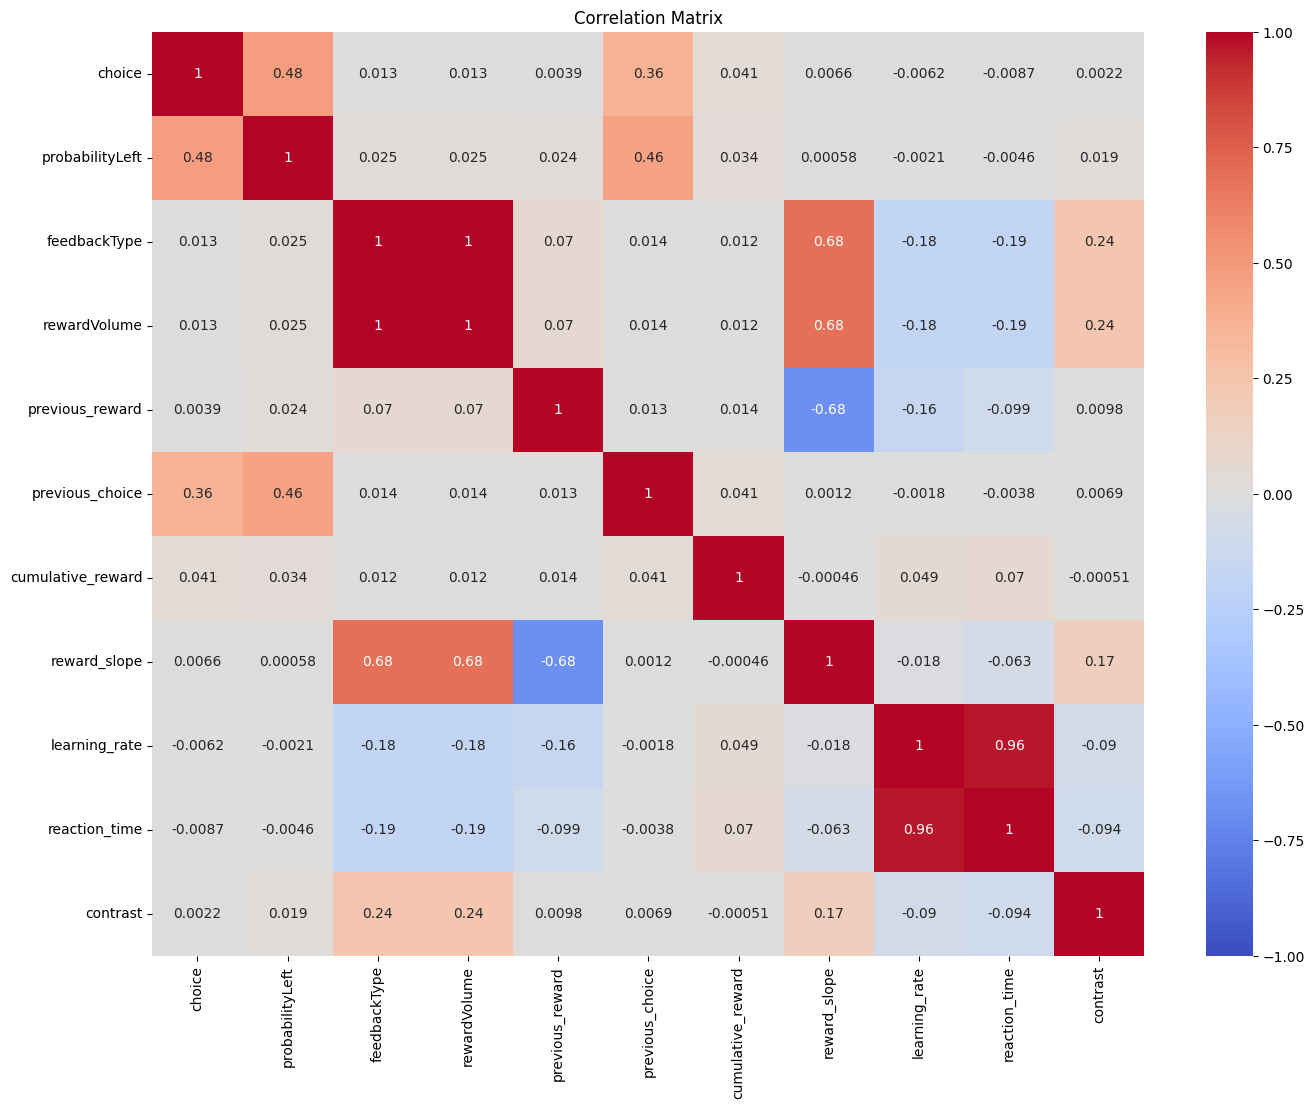

In [54]:
correlation_matrix = all_trials_df.drop(columns=["goCueTrigger_times","stimOff_times",
                                     "goCue_times", "response_times",
                                     "intervals_0","intervals_1","session_id",
                                     "contrastLeft", "contrastRight", "stimOn_times",
                                     "feedback_times", "firstMovement_times"]).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Train model
# Split the data into training and test sets
X = all_trials_df[['contrast']] # 0 nan so no need to .fillna(0)
y = all_trials_df['feedbackType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      3326
         1.0       0.82      1.00      0.90     15241

    accuracy                           0.82     18567
   macro avg       0.41      0.50      0.45     18567
weighted avg       0.67      0.82      0.74     18567

[[    0  3326]
 [    0 15241]]


/Users/guillemcomerma/Developer/nma/nma_cn_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillemcomerma/Developer/nma/nma_cn_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillemcomerma/Developer/nma/nma_cn_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Accuracy: 0.82


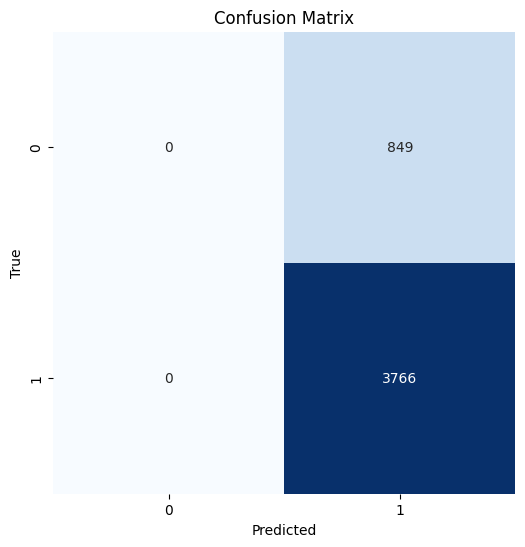

In [25]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [56]:
all_trials_df['rewardVolume'].shape

(61888,)

In [57]:
all_trials_df['rewardVolume'].value_counts()

rewardVolume
1.5    50695
0.0    11193
Name: count, dtype: int64

In [58]:
all_trials_df.columns

Index(['goCueTrigger_times', 'stimOff_times', 'goCue_times', 'response_times',
       'choice', 'stimOn_times', 'contrastLeft', 'contrastRight',
       'probabilityLeft', 'feedback_times', 'feedbackType', 'rewardVolume',
       'firstMovement_times', 'intervals_0', 'intervals_1', 'session_id',
       'previous_reward', 'previous_choice', 'cumulative_reward',
       'reward_slope', 'learning_rate', 'reaction_time', 'contrast'],
      dtype='object')

In [59]:
if 'cumulative_reward' in all_trials_df.columns:
    print("Column 'cumulative_reward' exists.")
else:
    print("Column 'cumulative_reward' does not exist.")

Column 'cumulative_reward' exists.


In [60]:
all_trials_df['previous_reward'].isna().sum()

100

In [61]:
all_trials_df['previous_reward'] = all_trials_df['previous_reward'].fillna(0)
all_trials_df['learning_rate'] = all_trials_df['learning_rate'].fillna(0)

In [62]:
print(all_trials_df['previous_reward'].isna().sum())
print(all_trials_df['cumulative_reward'].isna().sum())
print(all_trials_df['learning_rate'].isna().sum())
print(all_trials_df['cumulative_reward'].isna().sum())
print(all_trials_df['reward_slope'].isna().sum())

0
0
0
0
100


In [63]:
all_trials_df['reward_slope'] = all_trials_df['reward_slope'].fillna(0)
print(all_trials_df['reward_slope'].isna().sum())

0


In [64]:
filtered_df = all_trials_df[all_trials_df['reward_slope'].isna()]
filtered_df

,goCueTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,probabilityLeft,feedback_times,...,intervals_0,intervals_1,session_id,previous_reward,previous_choice,cumulative_reward,reward_slope,learning_rate,reaction_time,contrast


In [65]:
print(all_trials_df['previous_reward'].shape)
print(all_trials_df['cumulative_reward'].shape)

(61888,)
(61888,)


In [66]:
# Inclue more features
# Split the data into training and test sets

# X = all_trials_df[['contrast', 'cumulative_reward']]  # Add more features as needed
# X = all_trials_df[['contrast', 'cumulative_reward', 'previous_reward']]  # Add more features as needed
X = all_trials_df[['contrast', 'cumulative_reward', 'previous_reward', 'reward_slope', 'learning_rate']]  # Add more features as needed
y = all_trials_df['feedbackType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set       
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(model.coef_)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      3326
         1.0       1.00      1.00      1.00     15241

    accuracy                           1.00     18567
   macro avg       1.00      1.00      1.00     18567
weighted avg       1.00      1.00      1.00     18567

[[ 3324     2]
 [    8 15233]]
[[ 2.99775159e+00 -3.64233057e-03  8.51893556e+00  1.07407271e+01
  -1.16007222e-01]]


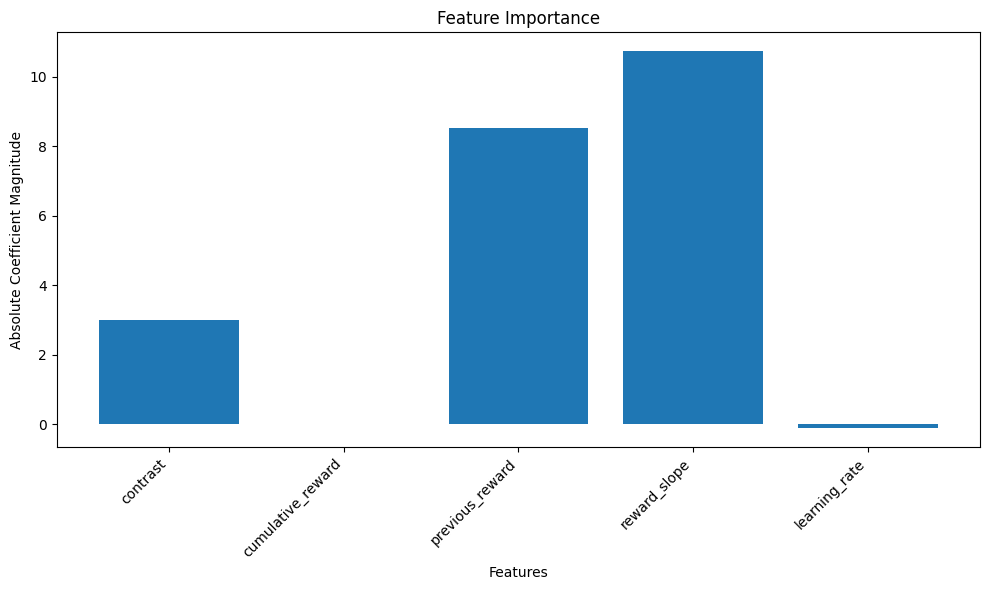

In [67]:
feature_names = ['contrast', 'cumulative_reward', 'previous_reward', 'reward_slope', 'learning_rate']
plt.figure(figsize=(10, 6))
plt.bar(feature_names, model.coef_[0])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Magnitude")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Accuracy: 1.00


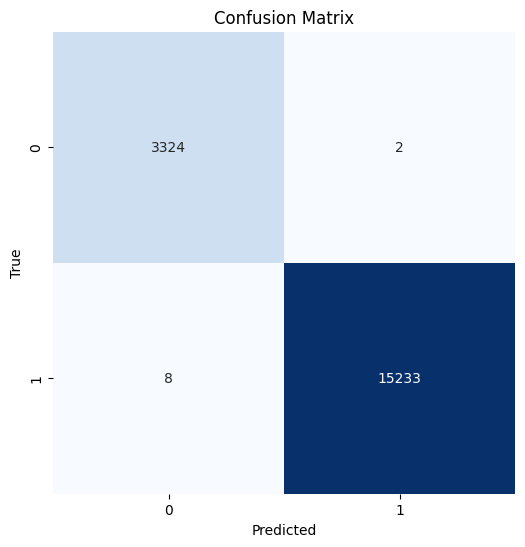

In [68]:
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [199]:
all_trials_df['learning_rate'].value_counts()

learning_rate
3.100033     1
3.064354     1
3.187444     1
4.985473     1
6.878511     1
            ..
6.273805     1
4.821912     1
4.620394     1
7.729904     1
15.420583    1
Name: count, Length: 15356, dtype: int64

In [200]:
all_trials_df['learning_rate'].isna().sum()

25

In [201]:
all_trials_df['learning_rate'] = all_trials_df['learning_rate'].fillna(0)

In [202]:
# Inclue more features
# Split the data into training and test sets
X = all_trials_df[['contrast', 'learning_rate']]  # Add more features as needed
y = all_trials_df['feedbackType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set       
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(model.coef_)

              precision    recall  f1-score   support

        -1.0       0.53      0.06      0.11       849
         1.0       0.82      0.99      0.90      3766

    accuracy                           0.82      4615
   macro avg       0.68      0.52      0.50      4615
weighted avg       0.77      0.82      0.75      4615

[[  52  797]
 [  46 3720]]
[[ 3.86998721 -0.0712566 ]]


Accuracy: 0.82


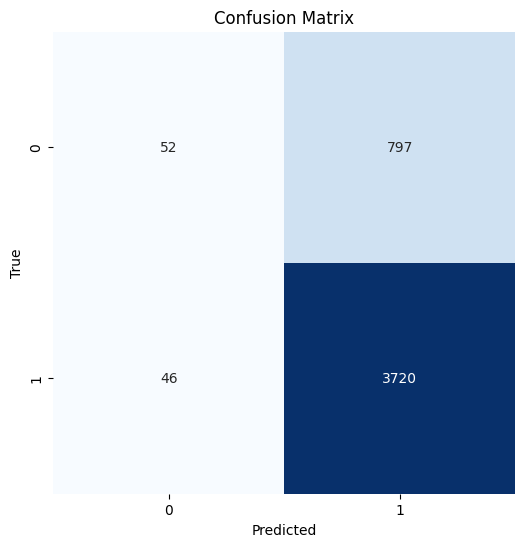

In [203]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

SLIDES
intro - theory - hypothesis/model - results - conclusion

Present it like a story


we thought the phenomenon worked this way, but based on our analysis, an our data, blablabla
we would need more time to test our hypothesis
our second approach 

if we have more days, what we would do....